# Lecture de fichiers exemples

L'objet de ce notebook est de valider qu'on peut lire les donnés contenues dans deux fichiers d'exemple : un fichier CSV et un fichier NetCDF.

## Lecture d'un fichier CSV au format OCO

La bilbliothèque Pandas permet de charger un fichier CSV gràce à la fonction [read_csv](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). On utilse cette fonction pour lire le fichier d'exemple on lui passant deux options :
- `parse_dates` permet d'indiquer les colonnes qui sont interprétées comme des dates
- `index_col` indique la colomne qui va servir d'index au *dataframe* Pandas
Dans les deux cas, on indique le numéro d'ordre de notre colonne de date (en comptant à partir de zéro).

In [26]:
import pandas as pd

filename = "data/mooring-buoys-time-series-62450.csv"
date_column_number = 1
df = pd.read_csv(filename, parse_dates=[date_column_number], index_col=date_column_number)

On visualise un apperçu du fichier :

In [55]:
df.head()

,PLATFORM,LATITUDE (degree_north),LONGITUDE (degree_east),TEMP LEVEL0 (degree_Celsius),DRYT LEVEL0 (degree_Celsius),PSAL LEVEL0 (psu),BATTERY LEVEL0 (volt),CNDC LEVEL0 (S/m),DEPH LEVEL0 (meter),DOX1 LEVEL0 (ml/l),...,PCO2_PUMP_CURR LEVEL1 (TBD),PCO2_THERMISTOR LEVEL1 (TBD),PHPH LEVEL1 (none),PHPH_ADJUSTED LEVEL1 (none),PSAL_ADJUSTED LEVEL1 (psu),START_CYCLE_FLOW LEVEL1 (l/minute),TEMP_ADJUSTED LEVEL1 (degree_Celsius),TEMP_CO2_ADJUSTED LEVEL1 (degree_Celsius),TUR4 LEVEL1 (ntu),QC
DATE (yyyy-mm-ddThh:mi:ssZ),,,,,,,,,,,,,,,,,,,,,
2000-07-19 15:33:16,62450,48.358,-4.5518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0111999999999999991999799991199999999999999999...
2000-07-19 15:58:32,62450,48.358,-4.5518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0111999999999999999999799991199999999999999999...
2000-07-19 16:18:32,62450,48.358,-4.5518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0111999999999999991999799991199999999999999999...
2000-07-19 16:33:17,62450,48.358,-4.5518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0111999999999999991999799991199999999999999999...
2000-07-19 16:58:32,62450,48.358,-4.5518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0111999999999999991999799991199999999999999999...


Cet apperçu nous montre qu'il y a des valeurs manquantes et qu'il semble n'y avoir qu'une seule station. Vérifions d'abord s'il y a bien une seule station :

In [56]:
df.PLATFORM.unique()

array([62450])

Il y a effectivement une seule station.

### Filtrage des valeurs manquantes

À présent on va essayer de visualiser une série temporelle de températures au niveau 0. Pour cela on va éliminer les lignes qui n'ont pas de valeur pour ce paramètres.

In [57]:
import numpy as np

column_name = "TEMP LEVEL0 (degree_Celsius)"
rows_with_temperature = df[df[column_name].isna()==False]
rows_with_temperature.head()

,PLATFORM,LATITUDE (degree_north),LONGITUDE (degree_east),TEMP LEVEL0 (degree_Celsius),DRYT LEVEL0 (degree_Celsius),PSAL LEVEL0 (psu),BATTERY LEVEL0 (volt),CNDC LEVEL0 (S/m),DEPH LEVEL0 (meter),DOX1 LEVEL0 (ml/l),...,PCO2_PUMP_CURR LEVEL1 (TBD),PCO2_THERMISTOR LEVEL1 (TBD),PHPH LEVEL1 (none),PHPH_ADJUSTED LEVEL1 (none),PSAL_ADJUSTED LEVEL1 (psu),START_CYCLE_FLOW LEVEL1 (l/minute),TEMP_ADJUSTED LEVEL1 (degree_Celsius),TEMP_CO2_ADJUSTED LEVEL1 (degree_Celsius),TUR4 LEVEL1 (ntu),QC
DATE (yyyy-mm-ddThh:mi:ssZ),,,,,,,,,,,,,,,,,,,,,
2017-06-01 12:40:00,62450,48.358,-4.5518,16.49,NaN,34.94,11.05,4.432,0.47,6.54,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0111191000119111919999999999999999999999999999...
2017-06-01 13:00:00,62450,48.358,-4.5518,15.70,NaN,34.91,11.05,4.351,0.50,6.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0111191000119111919999999999999999999999999999...
2017-06-01 13:20:00,62450,48.358,-4.5518,15.75,NaN,34.92,11.05,4.357,0.47,6.36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0111191000119111919999999999999999999999999999...
2017-06-01 13:40:00,62450,48.358,-4.5518,16.32,NaN,34.94,11.05,4.415,0.47,7.13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0111191000119111919999999999999999999999999999...
2017-06-01 14:00:00,62450,48.358,-4.5518,16.32,NaN,34.94,11.05,4.416,0.45,7.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0111191000119111919999999999999999999999999999...


### Visualisation

On visualise une série temporelle pour le paramètre température au niveau 0.

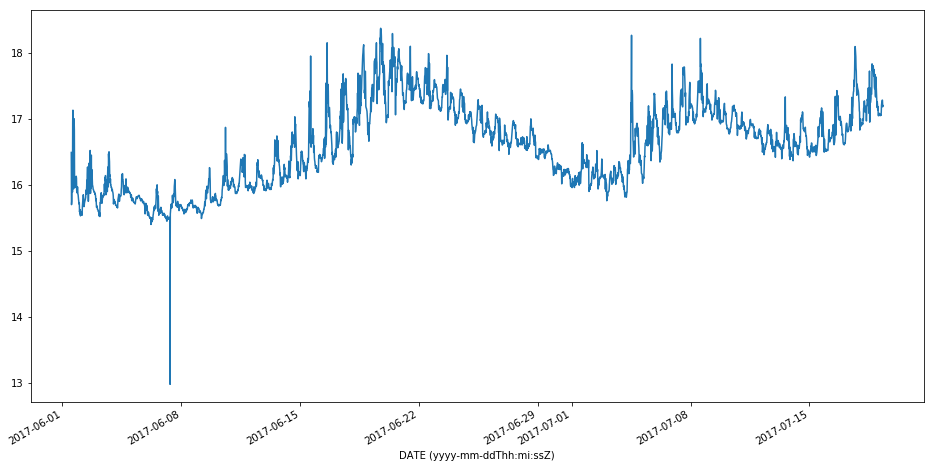

In [63]:
%matplotlib inline

size = (16, 8)
rows_with_temperature[column_name].plot(figsize=size);

## Lecture d'un fichier NetCDF d'exemple

La bibliothèque xarray permet de lire des fichier NetCDF.

In [59]:
import xarray as xr

filename = "data/GL_TS_MO_62450.nc"
ds = xr.open_dataset(filename)
ds

<xarray.Dataset>
Dimensions:               (DEPTH: 2, LATITUDE: 495905, LONGITUDE: 495905, POSITION: 495905, TIME: 495905)
Coordinates:
  * TIME                  (TIME) datetime64[ns] 2000-07-19T15:33:16.000000256 ... 2018-12-31T23:52:28.999999744
  * LATITUDE              (LATITUDE) float32 48.358 48.358 ... 48.35796 48.35796
  * LONGITUDE             (LONGITUDE) float32 -4.5518 -4.5518 ... -4.55175
Dimensions without coordinates: DEPTH, POSITION
Data variables:
    TIME_QC               (TIME) float32 ...
    POSITION_QC           (POSITION) float32 ...
    POSITIONING_SYSTEM    (POSITION) object ...
    DC_REFERENCE          (TIME) object ...
    DEPH                  (TIME, DEPTH) float32 ...
    DEPH_QC               (TIME, DEPTH) float32 ...
    DEPH_DM               (TIME, DEPTH) object ...
    FLU3_ADJUSTED         (TIME, DEPTH) float32 ...
    FLU3_ADJUSTED_QC      (TIME, DEPTH) float32 ...
    FLU3_ADJUSTED_DM      (TIME, DEPTH) object ...
    FLU3                  (TIME, DEP

Regardons un paramètre de plus prêt :

In [67]:
ds.TEMP

<xarray.DataArray 'TEMP' (TIME: 495905, DEPTH: 2)>
[991810 values with dtype=float32]
Coordinates:
  * TIME     (TIME) datetime64[ns] 2000-07-19T15:33:16.000000256 ... 2018-12-31T23:52:28.999999744
Dimensions without coordinates: DEPTH
Attributes:
    long_name:      Sea temperature
    standard_name:  sea_water_temperature
    units:          degrees_C

On constate que ce paramètre est indexé par date (`TIME`) et par niveau (`DEPTH`).

On visualise à présent une série temporelle pour ce paramètre au niveau 0. Les deux point (`:`) indiquent qu'on prends toutes les dates et le `0` indique qu'on prends le niveau 0.

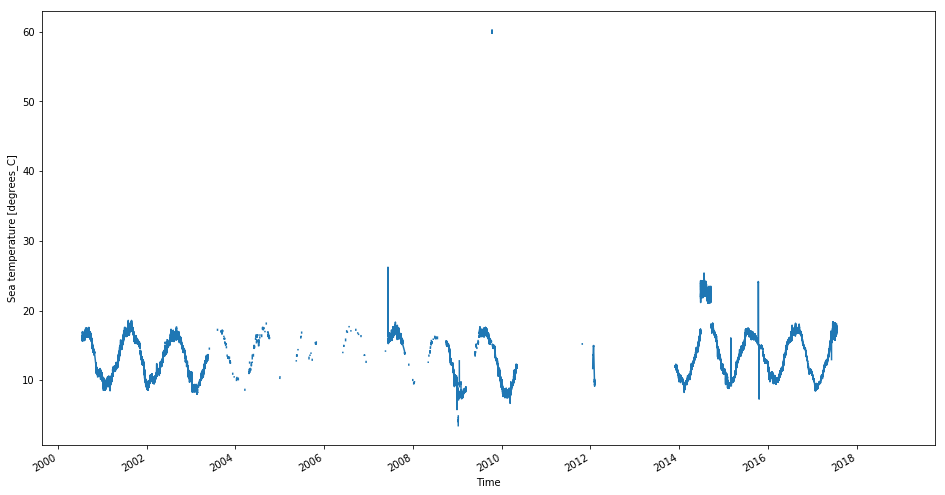

In [69]:
ds.TEMP[:,0].plot(figsize=size);